# Exploratory data analysis

In [18]:
from calibration.dataprocessing import loaddata
#import airpollutionmodel as a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from airpollutionmodel.sensors import Sensor, Network
import folium as f

In [2]:
# data = loaddata('airqo.json', next_days = 5, since = '2021-03-05')
# data.to_csv("../Data/sensor_data.csv", index = False)
data = pd.read_csv("../Data/sensor_data.csv")

In [3]:
data.head()

,created_at,channel_id,entry_id,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,voltage,altitude,wind,no_sats,hdope,temperature,humidity
0,2021-02-28 14:08:29,675991,623658,62.28,72.47,63.90,74.23,0.177971,30.083656,3.73,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-28 12:50:46,675991,623598,67.85,75.35,66.55,75.75,0.177951,30.083658,3.73,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-28 11:31:11,675991,623536,72.82,78.32,75.07,80.63,0.177983,30.083658,3.73,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-28 12:38:04,675991,623588,65.08,73.40,65.43,74.62,0.177923,30.083660,3.73,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-28 12:44:27,675991,623593,67.53,73.80,68.07,75.92,0.178041,30.083660,3.73,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def within_dist(lat, lon, limit):
    
    dist = np.sqrt((data['latitude'] - lat)**2 + (data['longitude'] - lon)**2)
    return dist < limit

data = data[within_dist(0.1849, 32.3452, .3)]

In [5]:
data.index = range(len(data))
data.head()

,created_at,channel_id,entry_id,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,voltage,altitude,wind,no_sats,hdope,temperature,humidity
0,2021-02-28 14:43:36,755612,544819,30.60,33.02,32.53,35.50,0.289052,32.589577,4.27,1179.0,0.04,5.0,126.0,255.0,255.0
1,2021-03-01 05:57:49,755612,545314,35.00,40.82,42.38,49.53,0.289049,32.589603,4.27,1183.5,0.12,5.0,175.0,255.0,255.0
2,2021-03-01 05:27:14,755612,545294,54.08,65.80,63.42,71.23,0.289005,32.589504,4.27,1209.5,0.01,6.0,143.0,255.0,255.0
3,2021-03-01 05:52:23,755612,545310,37.18,42.82,40.30,46.93,0.289050,32.589550,4.27,1167.4,0.02,6.0,111.0,255.0,255.0
4,2021-02-28 20:58:25,755612,544936,88.53,91.80,97.00,98.42,0.289066,32.589565,4.28,1181.7,0.03,6.0,107.0,255.0,255.0


In [6]:
data.groupby(['channel_id']).nunique().loc[:,['latitude', 'longitude']]

,latitude,longitude
channel_id,,
689761,658,138
718029,229,62
730014,146,60
737276,299,114
755612,159,57
782718,178,120
782719,430,133
782720,18,15
782721,629,252


## Mapping

In [7]:
m = f.Map(location = [data['latitude'].median(), data['longitude'].median()])

for i in np.random.randint(0, len(data), 500):
    f.Marker(location = list(data.loc[i, ['latitude', 'longitude']])).add_to(m)
m

In [8]:
network = Network(data)

In [9]:
network.IDs

[755612,
 730014,
 967601,
 718029,
 832251,
 737276,
 870140,
 832252,
 832253,
 870142,
 832254,
 782718,
 930427,
 912221,
 870147,
 912225,
 782721,
 689761,
 782719,
 870146,
 782722,
 912220,
 782720,
 967600]

In [13]:
sensor755data = network.sensors[755612].data(network)

<AxesSubplot:xlabel='created_at'>

<Figure size 1296x504 with 0 Axes>

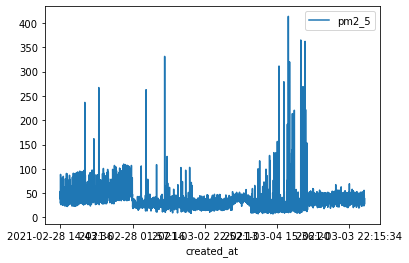

In [19]:
plt.figure(figsize = (18, 7))
sensor755data.plot(x = 'created_at', y = 'pm2_5')